In [1]:
import os
import sys

from tensorflow import keras

module_path = os.path.abspath(os.path.join('..', '..', '..'))

if module_path not in sys.path:
    sys.path.append(os.path.join(module_path))

from functions.augmentation import get_augmentation_layers
from functions.class_weights import calculate_class_weight
from functions.model_running import get_run_number, run_model
from functions.loading_data import load_dataset
from models.efficientnet_v2 import get_v2b3_model

In [2]:
WIDTH = 150
HEIGHT = 150
ROOT = os.path.join('..', '..', '..', '..')
DS_NAME = 'data1'
DATA_DIR = os.path.join(
    ROOT,
    '..',
    DS_NAME,
    'images_original_inception_resnet_v2_150x150_categorized')
MODEL_NAME_BASE = 'efficientnet_v2_9_v2b3_class_weights'

In [3]:
BATCH_SIZE = 32
# dataset = load_dataset(HEIGHT, WIDTH, DATA_DIR, 'training', BATCH_SIZE)
# class_weight = calculate_class_weight(dataset, .6)
class_weight = {
    0: 4.528537585685208,
    1: 3.892096468068666,
    2: 3.300900528086318,
    3: 7.75870685219699,
    4: 3.29447516332762,
    5: 2.8658300243916535,
    6: 6.797989842280895}

In [4]:
METRICS = [
    keras.metrics.CategoricalCrossentropy(name='categorical cross entropy'),
    keras.metrics.MeanSquaredError(name='mean squared error'),
    keras.metrics.CategoricalAccuracy(name='accuracy'),
    keras.metrics.AUC(name='auc', multi_label=True),
    keras.metrics.AUC(name='prc', curve='PR', multi_label=True)
]

Found 8015 files belonging to 7 classes.
Found 2000 files belonging to 7 classes.
Epoch 1/100
251/251 [==============================] - ETA: 0s - loss: 4.4904 - categorical cross entropy: 1.2253 - mean squared error: 0.0661 - accuracy: 0.6635 - auc: 0.7843 - prc: 0.2924

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_9_v2b3_class_weights_20_1\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_9_v2b3_class_weights_20_1\assets


251/251 [==============================] - 119s 405ms/step - loss: 4.4904 - categorical cross entropy: 1.2253 - mean squared error: 0.0661 - accuracy: 0.6635 - auc: 0.7843 - prc: 0.2924 - val_loss: 0.7841 - val_categorical cross entropy: 0.7841 - val_mean squared error: 0.0514 - val_accuracy: 0.7400 - val_auc: 0.8986 - val_prc: 0.5001 - lr: 0.0010
Epoch 2/100
251/251 [==============================] - ETA: 0s - loss: 2.9383 - categorical cross entropy: 0.8134 - mean squared error: 0.0553 - accuracy: 0.7143 - auc: 0.8663 - prc: 0.4100

INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_9_v2b3_class_weights_20_2\assets


INFO:tensorflow:Assets written to: ..\..\..\..\tmp_models\efficientnet_v2_9_v2b3_class_weights_20_2\assets


251/251 [==============================] - 101s 400ms/step - loss: 2.9383 - categorical cross entropy: 0.8134 - mean squared error: 0.0553 - accuracy: 0.7143 - auc: 0.8663 - prc: 0.4100 - val_loss: 0.6496 - val_categorical cross entropy: 0.6496 - val_mean squared error: 0.0453 - val_accuracy: 0.7845 - val_auc: 0.9157 - val_prc: 0.5672 - lr: 0.0010
Epoch 3/100
251/251 [==============================] - 52s 204ms/step - loss: 2.8192 - categorical cross entropy: 0.7831 - mean squared error: 0.0537 - accuracy: 0.7255 - auc: 0.8817 - prc: 0.4509 - val_loss: 0.7724 - val_categorical cross entropy: 0.7724 - val_mean squared error: 0.0562 - val_accuracy: 0.7020 - val_auc: 0.9226 - val_prc: 0.6031 - lr: 0.0010
Epoch 4/100
251/251 [==============================] - 52s 205ms/step - loss: 2.7386 - categorical cross entropy: 0.7655 - mean squared error: 0.0526 - accuracy: 0.7314 - auc: 0.8886 - prc: 0.4688 - val_loss: 0.6893 - val_categorical cross entropy: 0.6893 - val_mean squared error: 0.0476 

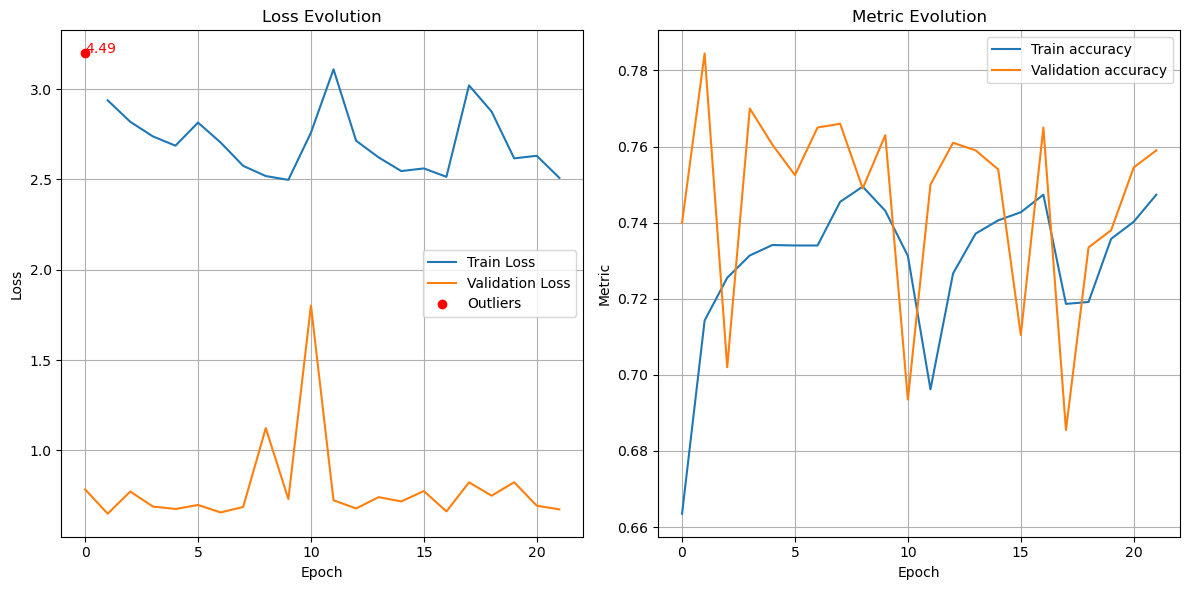

(<keras.engine.functional.Functional at 0x109b48d5670>,
 <keras.callbacks.History at 0x109b4848df0>)

In [5]:
run_model(
    ROOT,
    HEIGHT,
    WIDTH,
    DATA_DIR,
    DS_NAME,
    MODEL_NAME_BASE,
    lambda num_classes:
        lambda: get_v2b3_model(
            HEIGHT,
            WIDTH,
            num_classes,
            metrics=METRICS),
    get_augmentation_layers,
    class_weight=class_weight)